<a href="https://colab.research.google.com/github/jyj0607040607/AIStudy24/blob/master/%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥

*   심층 신경망
*   실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.

In [3]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [6]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 케라스 API에서 패션 MNIST 데이터 셋을 불러옴
# 훈련세트와 테스트 셋을 만듬

In [7]:
from sklearn.model_selection import train_test_split

# 이미지의 필셀 값이 0 ~ 155 범위에서 0 ~ 1 사이로 변환
train_scaled = train_input / 255.0
# 28 X 28 크기의 2차원 배열을 만들어 784 크기의 1차원 배열로 펼친다.
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.3, random_state=42)
# 20%의 훈련세트와 검증세트로 분할

In [8]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [9]:
print(train_scaled.shape, test_target.shape)

(42000, 784) (10000,)


In [10]:
print(val_scaled.shape, val_target.shape)

(18000, 784) (18000,)


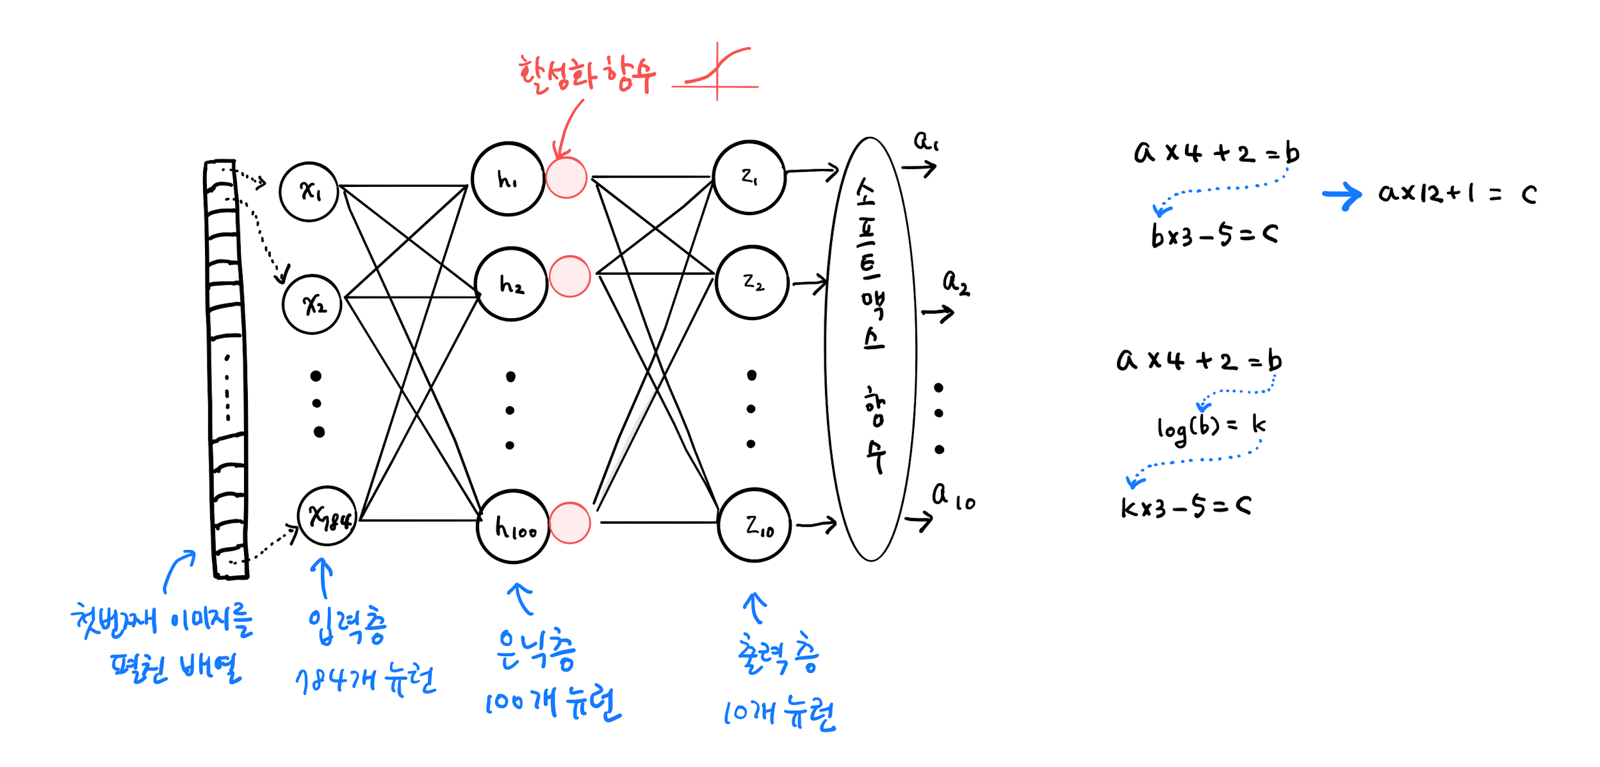

인공 신경망 모델에 2개의 레이어를 추가해 보자

전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된것
*   은닉층(hidden layer)

은닉층에는 주황색원으로 활성화 함수가 표시되어 있다.

활성화 함수는 신경망 층의 선형 방정식 계산 값에 적용하는 함수이다.

출력층에 적용하는 활성화 함수는 종류가 제한되어 있다.
*   이진분류(시그모이드함수), 다중분류(소프트맥스함수) -> 분류를 위한이다.

은닉층은 활성화 함수가 자유롭다 (대표적 : 시그모이드 함수, 볼 렐루 함수등등)
*   a*4+2 * b -> b * 3-5=c라고 했을때 b가 하는 일은 임시용 -> a*12+1=c

신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할일 없는 셈

선형 계산을 적당하게 비선형적으로 비틀어줘야 한다.

그래야 다음 층의 계산과 단순히 합쳐지지않고 나름의 역할을 할 수 있다.

*  a*4+2 * b -> log(b)=k, k * 3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

In [11]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 은닉층과 소프트 함수를
# 사용한 출력층을 케라스 Dense 클래스로 만들어 보자.

dense1 = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# input_shape=(784,) 입력의 크기 필수

# dense1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 스그모이드로 설정
# 몇개의 뉴런이 필요할 지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야한다.
# 클래스 10개의 대한 확률를 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안된다.

dense2 = keras.layers.Dense(10, activation='softmax')
# dencse2은 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 돈다.)
# 활성화 함수로 소프트 맥스 함수로 지정

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 심층 신경망 만들기
model = keras.Sequential([dense1, dense2])

위에서 만든 dense1, dense2를 Sequential 클래스에 추가하여 심층(deep) 신경망을 만든다.

dense1, dense2를 리스트로 만들어 전달한다.

*   주의 : 뒤에가 출력층임으로 dense2를 설정
*   인공 신경망의 강력한 성능은 층을 추가하여 입력 데이터에 비해 연속적인 학습을 진행하는 능력
*    2개 이상 층을 추가 가능

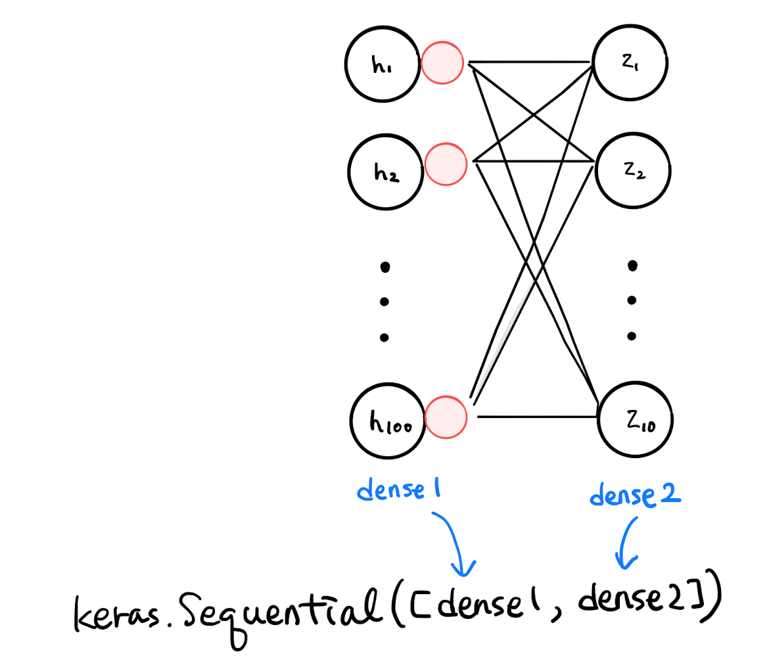

In [13]:
model.summary() # 층에 대한 유용한 정보가 나옴

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

맨 첫줄에 모델의 이름

*  그 다음 이 모델이 들어 있는 층이 순서대로 나온다.

*  맨 처음 추가한 은닉층에서 출력층의 순서대로 나온다

*   층이름 (클래스), 출력크기, 모델 파라미터 개수

*   출력크기 (None(샘플의 개수 : 아직 정의 되지 않음), 100)
                    -> 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한번에 모두 사용하지 않고 잘게 나누어 여러번 결쳐 경사 하강법 단계를 수행 (미니배치 경사 하강법)

*    케라스의 기본 미니배치 크기는 32개임

이 값은 fit() 매서드에서 vatch_size 매개변수로 변경 가능

따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응 할 수 있도록 None 으로 설정이 최선이다.

신경망 층에서 입력되거나 출력되는 배열의 첫 번째 차원을 배치 자원이라고 부른다.

출력크기 (None, 100 -> 은닉층의 뉴런 개수를 100개의 출력이 나온다)

*  ->  샘플마다 784개의 픽셀 값이 은닉층을 통과하면서 100개의 특성으로 압축

마지막으로 파라미터 개수가 출력된다. ( 784 * 100 + 100 =89500)

두번째 층의 출력 크기 (None, 10) -> 뉴런 개수 10개이다.

*  파라미터는 100 * 10 + 10 = 1010개

*  맨 아래 있는 Non-trainable params: 0 (0.00 B) 는 훈련되지 않는 파라미터(간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터)

In [15]:
# 두번째 심층 만드는 방법

# Sequential 클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Dense는 따로 저장 하여 쓸일이 없기 때문에 아래 코드처럼 Sequential 클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'), # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델') # 모델의 이름

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from itertools import accumulate
# 층 추가시 가장 편한 방법은 .add()를 사용한다.
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
# 모델 훈련 시작
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7459 - loss: 0.7825
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8463 - loss: 0.4346
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8616 - loss: 0.3922
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3659
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8763 - loss: 0.3467


In [ ]:
# 1개의 층으로만 돌렸을 때는 정확도가 85.37%
# 2개의 층으로 돌렸을 경우 정확도가 87.40% 로 행상되었다.

In [20]:
# 훈련결과를 보면 훈련 세트에 대한 성능이 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다.
model.evaluate(val_scaled, val_target)    # 검증 점수 86.84%

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8686 - loss: 0.3640


[0.36760300397872925, 0.8683333396911621]

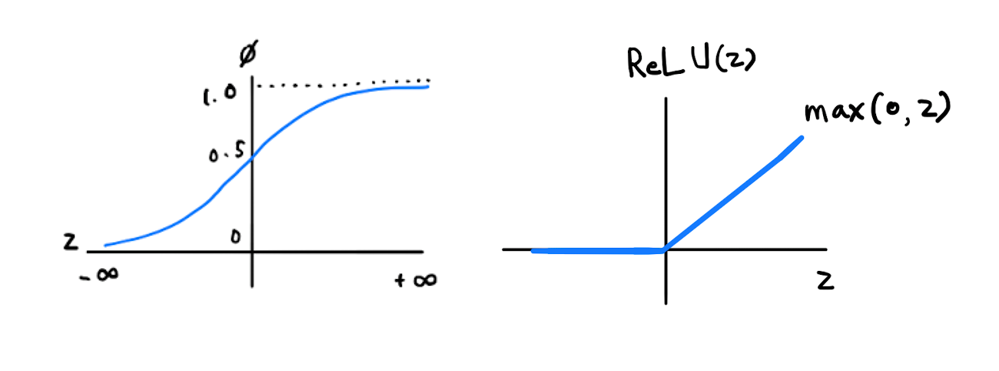

초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만 단점이 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못한다.

특히, 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만든다.

*  개선을 위해서 다른 종류의 활서오하 함수가 제안 되었는데 바로 렐루(ReLU) 함수이다.
*   렐루 함수는 입력이 양수 일 경우 마치 활성화 함수가 없는 것 처럼 그냥 입력을 통과 시키고 음수 일 경우 0으로 만든다.
*   렐루 함수는 max(0, z)와 같이 쓴다.
*   z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력한다.

렐수 함수는 특히 이미지 처리에 좋은 성능을 낸다고 한다.

은닉 층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에

*   케라스에서 제공하는 편리한 층 하나가 있다. -> Flatten
*   Flatten(플래튼) : 단조롭게하다.
*   클래스는 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬도 펼치는 역할만 한다. ( 가중치, 절편 없다.)

*   절편 : 직선이 x축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)를 통틀어 이르는 말이다

하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부른다.

*    입력층 바로 뒤에 플래튼 층 추가

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))   # 입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 케라스의 플래튼 층을 신경만 도델에 추가하면
# 입력값의 차원을 짐작할 수 있는 것이 장점이 된다.

# (None, 784) -> 784개의 입력이 첫 번째 은닉층에 전달됨을 알수 있다.
model.add(keras.layers.Dense(100, activation='relu'))   # 렐루층 : true/ false를 1단계에서 검사
model.add(keras.layers.Dense(10, activation='softmax'))  # 소프트 맥스층
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 훈련 데이터를 준비해서 모델 훈련시작
# reshape() 메서드 제외이다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
      train_scaled, train_target, test_size=0.2, random_state=42)

In [32]:
model.compile(loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5) # 전과 비교해보면 조금 향상됨

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7646 - loss: 0.6831
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8512 - loss: 0.4091
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8696 - loss: 0.3627
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8787 - loss: 0.3369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8871 - loss: 0.3188


In [33]:
model.evaluate(val_scaled, val_target) # 전과 비교해보면 조금 향상됨

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.4130


[0.41107743978500366, 0.8601666688919067]